In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

### What is Churn Prediction?¶
Churn prediction is analytical studies on the possibility of a customer abandoning a product or service.

In [543]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [544]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [546]:
# dropping the customer id beacause it will not help to predict if the customer will leave or not 
data = data.drop("customerID",axis=1)

In [547]:
#to make the monthlycharges column float rather than object we had to drop the rows that doesnt have a value 
empty = data.loc[data['TotalCharges']== " "]
print(len(empty))
data = data.drop(index=empty.index)

11


In [548]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Finding the correlation 
#### it's seems there is weak positive linear relationship  between the label and Monthly charges and senior citizen(when they increase the likelihood of a churn is going to increase )

In [550]:
data1= pd.DataFrame()
data1['SeniorCitizen']= data['SeniorCitizen']
data1['tenure']= data['tenure']
data1['MonthlyCharges']= data['MonthlyCharges']
data1['TotalCharges']=data['TotalCharges']
data1['Churn'] = data['Churn']

mapping = {'Yes': 1, 'No': 0}
# Transform the values in the 'column_name' column
data1['Churn'] = data1['Churn'].replace(mapping)

corr_matrix = data1.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64

## Splitting the data

In [551]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
for train,test in sss.split(data,data['Churn']):
    train_set =data.iloc[train]
    test_set  =data.iloc[test]
    
print('train_set = ',len(train_set))
print('test_set  = ',len(test_set))

train_set =  5625
test_set  =  1407


In [552]:
test_x = test_set.drop('Churn',axis=1)
test_y = test_set['Churn'].copy()
train_x = train_set.drop('Churn',axis=1)
train_y = train_set['Churn'].copy()

### no missing values 

In [553]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [554]:
test_x.info()
test_x.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 5134 to 6019
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1407 non-null   object 
 1   SeniorCitizen     1407 non-null   object 
 2   Partner           1407 non-null   object 
 3   Dependents        1407 non-null   object 
 4   tenure            1407 non-null   int64  
 5   PhoneService      1407 non-null   object 
 6   MultipleLines     1407 non-null   object 
 7   InternetService   1407 non-null   object 
 8   OnlineSecurity    1407 non-null   object 
 9   OnlineBackup      1407 non-null   object 
 10  DeviceProtection  1407 non-null   object 
 11  TechSupport       1407 non-null   object 
 12  StreamingTV       1407 non-null   object 
 13  StreamingMovies   1407 non-null   object 
 14  Contract          1407 non-null   object 
 15  PaperlessBilling  1407 non-null   object 
 16  PaymentMethod     1407 non-null   object 
 1

(1407, 19)

In [555]:
train_x.info()
train_x.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 3786 to 6825
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   object 
 1   SeniorCitizen     5625 non-null   object 
 2   Partner           5625 non-null   object 
 3   Dependents        5625 non-null   object 
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   object 
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   object 
 16  PaymentMethod     5625 non-null   object 
 1

(5625, 19)

##  Outliers

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


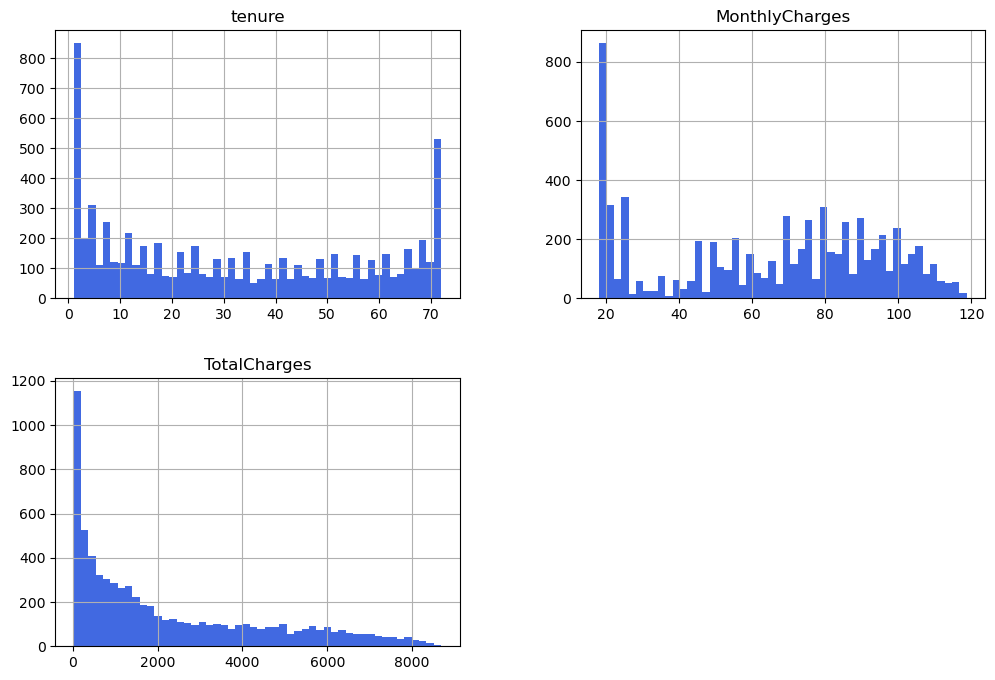

In [556]:
data.hist(bins=50, figsize=(12, 8),color="royalblue")
data.describe()

<Axes: ylabel='tenure'>

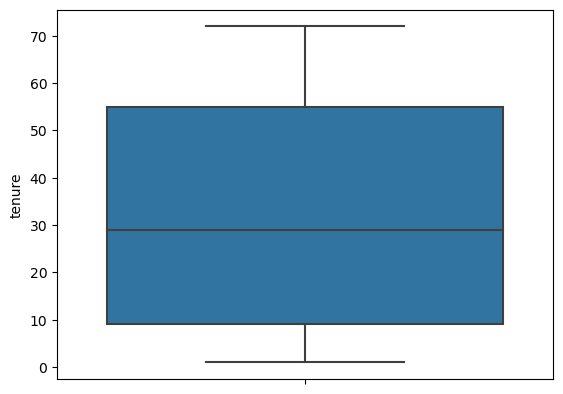

In [557]:
sns.boxplot(data=data, y= "tenure")

<Axes: ylabel='MonthlyCharges'>

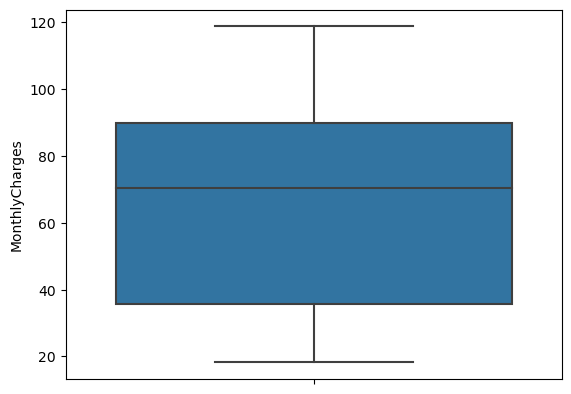

In [558]:
sns.boxplot(data=data, y= "MonthlyCharges")

<Axes: ylabel='TotalCharges'>

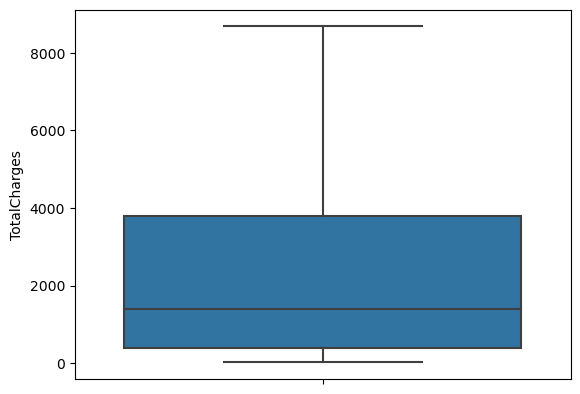

In [559]:
sns.boxplot(data=data, y= "TotalCharges")

### It's seems there is No Outliers 

## Preproccessing 

In [560]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [561]:
train_x.head(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3786,Male,0,Yes,Yes,27,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.75,1929.00
1593,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.85,84.20
2932,Male,1,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.60,6292.70
198,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),112.25,8041.65
4512,Female,1,No,No,70,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),75.50,5212.65
275,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.40,401.10


In [562]:
categ = list(train_x.select_dtypes(include=['object']).columns)
print(categ)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [563]:
numeric = list(train_x.select_dtypes(include=['int64','float64']).columns)
print(numeric)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [564]:
numeric = ['tenure', 'MonthlyCharges','TotalCharges']
one_hot_list = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV',
               'StreamingMovies','Contract', 'PaymentMethod','MultipleLines','PaperlessBilling',
                'PhoneService','InternetService']
ordinal_list = ['gender', 'Partner', 'Dependents','SeniorCitizen']

In [565]:
train_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [566]:
full_pipeline = ColumnTransformer([
    ('sta', StandardScaler(), numeric),
    ('hot',OneHotEncoder(),one_hot_list),
    ('ord',OrdinalEncoder(),ordinal_list)
])
train_x= full_pipeline.fit_transform(train_x)
train_x=pd.DataFrame(train_x,columns= full_pipeline.get_feature_names_out())

test_x= full_pipeline.transform(test_x)
test_x=pd.DataFrame(test_x,columns= full_pipeline.get_feature_names_out())
full_pipeline.get_feature_names_out()

array(['sta__tenure', 'sta__MonthlyCharges', 'sta__TotalCharges',
       'hot__OnlineSecurity_No',
       'hot__OnlineSecurity_No internet service',
       'hot__OnlineSecurity_Yes', 'hot__OnlineBackup_No',
       'hot__OnlineBackup_No internet service', 'hot__OnlineBackup_Yes',
       'hot__DeviceProtection_No',
       'hot__DeviceProtection_No internet service',
       'hot__DeviceProtection_Yes', 'hot__TechSupport_No',
       'hot__TechSupport_No internet service', 'hot__TechSupport_Yes',
       'hot__StreamingTV_No', 'hot__StreamingTV_No internet service',
       'hot__StreamingTV_Yes', 'hot__StreamingMovies_No',
       'hot__StreamingMovies_No internet service',
       'hot__StreamingMovies_Yes', 'hot__Contract_Month-to-month',
       'hot__Contract_One year', 'hot__Contract_Two year',
       'hot__PaymentMethod_Bank transfer (automatic)',
       'hot__PaymentMethod_Credit card (automatic)',
       'hot__PaymentMethod_Electronic check',
       'hot__PaymentMethod_Mailed check', 'h

In [567]:
train_y

3786     No
1593     No
2932     No
198      No
4512     No
       ... 
6177    Yes
4551     No
3963     No
6139     No
6825     No
Name: Churn, Length: 5625, dtype: object

In [568]:
train_x.head(10)

,sta__tenure,sta__MonthlyCharges,sta__TotalCharges,hot__OnlineSecurity_No,hot__OnlineSecurity_No internet service,hot__OnlineSecurity_Yes,hot__OnlineBackup_No,hot__OnlineBackup_No internet service,hot__OnlineBackup_Yes,hot__DeviceProtection_No,...,hot__PaperlessBilling_Yes,hot__PhoneService_No,hot__PhoneService_Yes,hot__InternetService_DSL,hot__InternetService_Fiber optic,hot__InternetService_No,ord__gender,ord__Partner,ord__Dependents,ord__SeniorCitizen
0,-0.219204,0.360948,-0.157445,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,-1.158106,-1.535042,-0.972422,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.923807,1.622164,1.770307,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,1.617778,1.577180,2.542941,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,1.536134,0.352617,1.293173,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,-1.117284,0.682500,-0.832425,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6,1.168738,0.532553,1.169412,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.882985,-0.170529,0.424565,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,-0.913175,0.510894,-0.635882,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,-1.280572,0.172682,-0.978651,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [569]:
label_encoder = LabelEncoder()
train_y=label_encoder.fit_transform(train_y)
test_y=label_encoder.transform(test_y)

In [570]:
pd.DataFrame(train_y).value_counts()


0    4130
1    1495
Name: count, dtype: int64

In [571]:
pd.DataFrame(test_y).value_counts()

0    1033
1     374
Name: count, dtype: int64

##  Classifiers 

In [572]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

### Perceptron

#### I chose early stopping to be true beacause it will preform better on training set...

In [573]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc_param= {'early_stopping' : [True] , 'penalty':['l2','l1','elasticnet'] }
grid_perc = GridSearchCV(perc,perc_param,cv=3,scoring='accuracy')
grid_perc.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=Perceptron(),
             param_grid={'early_stopping': [True],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [574]:
grid_perc.best_params_

{'early_stopping': True, 'penalty': 'elasticnet'}

In [575]:
print("Accuracy on Training set = " , grid_perc.best_score_)

Accuracy on Training set =  0.7125333333333334


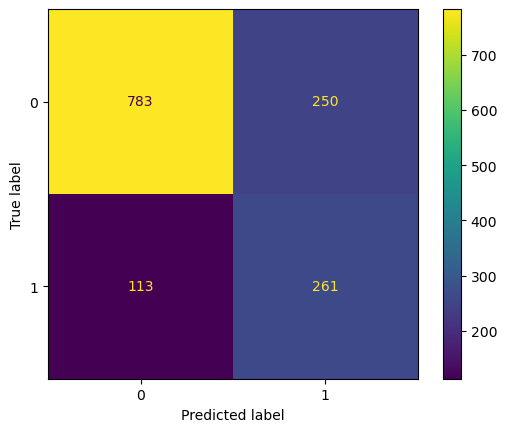

In [576]:
test_pred_y_perc = grid_perc.predict(test_x)
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y_perc)
plt.show()

In [577]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('Accuracy score = ',accuracy_score(test_y,test_pred_y_perc))
print("Percision Score = " , precision_score(test_y,test_pred_y_perc))
print("Recall Score = " , recall_score(test_y,test_pred_y_perc))


Accuracy score =  0.7420042643923241
Percision Score =  0.5107632093933464
Recall Score =  0.6978609625668449


### Support Vector Classifier (SVC)

In [578]:
from sklearn.svm import SVC
svc = SVC()
svc_param = {'C' : [0.1,1],'kernel' :['rbf','sigmoid','poly'],
             'gamma': ['auto','scale'],'verbose':[True]
            }
grid_svc = GridSearchCV(svc,svc_param,cv=3,scoring='accuracy')
grid_svc.fit(train_x,train_y)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid', 'poly'],
                         'verbose': [True]},
             scoring='accuracy')

In [579]:
grid_svc.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'verbose': True}

In [580]:
print("Accuracy on Training set = " , grid_svc.best_score_)

Accuracy on Training set =  0.8007111111111112


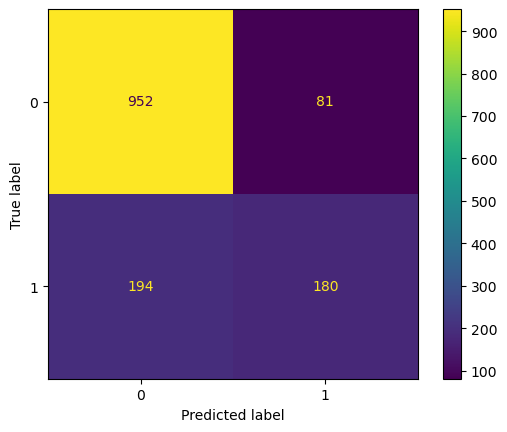

In [581]:
test_pred_y_svc = grid_svc.predict(test_x)
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y_svc)
plt.show()

In [582]:
print('Accuracy score = ',accuracy_score(test_y,test_pred_y_svc))
print("Percision Score = " , precision_score(test_y,test_pred_y_svc))
print("Recall Score = " , recall_score(test_y,test_pred_y_svc))

Accuracy score =  0.8045486851457001
Percision Score =  0.6896551724137931
Recall Score =  0.48128342245989303


# Random Forest

In [647]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_param = {'n_estimators': [50,100,200],
             'criterion' :['gini','entropy','log_loss'],
             'max_depth':[3,5,7,9]
            }
grid_rfc = GridSearchCV(rfc,rfc_param,cv=3,scoring='accuracy')
grid_rfc.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [648]:
grid_rfc.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}

In [649]:
print("Accuracy on Training set = " , grid_rfc.best_score_)

Accuracy on Training set =  0.8005333333333334


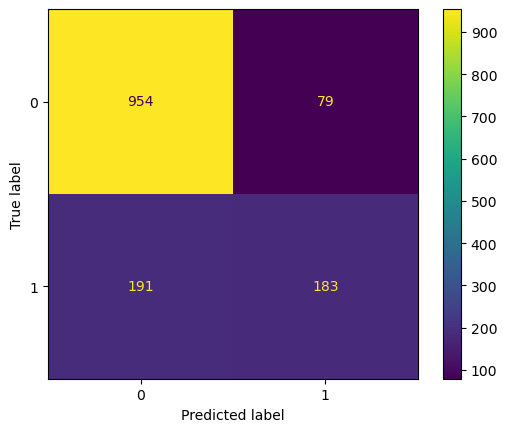

In [650]:
test_pred_y_rfc = grid_rfc.predict(test_x)
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y_rfc)
plt.show()

In [652]:
print('Accuracy score = ',accuracy_score(test_y,test_pred_y_rfc))
print("Percision Score = " , precision_score(test_y,test_pred_y_rfc))
print("Recall Score = " , recall_score(test_y,test_pred_y_rfc))

Accuracy score =  0.8081023454157783
Percision Score =  0.6984732824427481
Recall Score =  0.4893048128342246


###  Logistic Regression

In [611]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log_param = {'penalty': ['l1', 'l2', 'elasticnet', None],
             'C': [0.1,0.3,0,5,0.7,1] , 
             'solver' : ['liblinear','newton-cholesky','lbfgs'],
            }
grid_log = GridSearchCV(log,log_param,cv=5,scoring='accuracy')
grid_log.fit(train_x,train_y)

C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will igno

C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):

C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\HP14\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 0, 5, 0.7, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'newton-cholesky', 'lbfgs']},
             scoring='accuracy')

In [612]:
grid_log.best_params_

{'C': 0.7, 'penalty': 'l1', 'solver': 'liblinear'}

In [613]:
print("Accuracy on Training set = " , grid_log.best_score_)

Accuracy on Training set =  0.8037333333333333


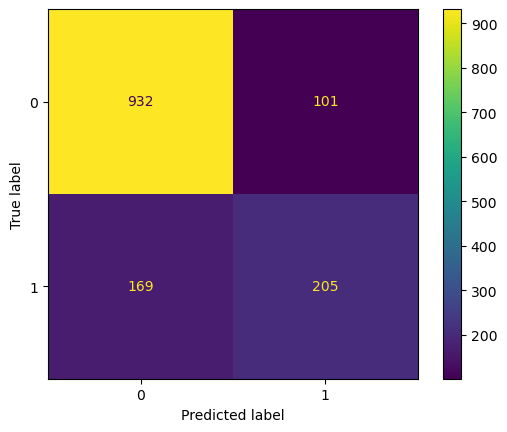

In [614]:
test_pred_y_log = grid_log.predict(test_x)
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y_log)
plt.show()

In [610]:
print('Accuracy score = ',accuracy_score(test_y,test_pred_y_rfc))
print("Percision Score = " , precision_score(test_y,test_pred_y_rfc))
print("Recall Score = " , recall_score(test_y,test_pred_y_rfc))

Accuracy score =  0.7945984363894811
Percision Score =  0.6579925650557621
Recall Score =  0.4732620320855615


### SGDClassifier

In [631]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_param = {'loss':['log_loss','modified_huber','perceptron'],
             'learning_rate':['optimal','adaptive'],
             'early_stopping':[True,False],
             'eta0' :[0.05,0.1,0.2]
            }
grid_sgd = GridSearchCV(sgd,sgd_param,cv=5,scoring='accuracy')
grid_sgd.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'early_stopping': [True, False],
                         'eta0': [0.05, 0.1, 0.2],
                         'learning_rate': ['optimal', 'adaptive'],
                         'loss': ['log_loss', 'modified_huber', 'perceptron']},
             scoring='accuracy')

In [632]:
grid_sgd.best_params_

{'early_stopping': True,
 'eta0': 0.05,
 'learning_rate': 'adaptive',
 'loss': 'log_loss'}

In [633]:
print("Accuracy on Training set = " , grid_sgd.best_score_)

Accuracy on Training set =  0.8039111111111111


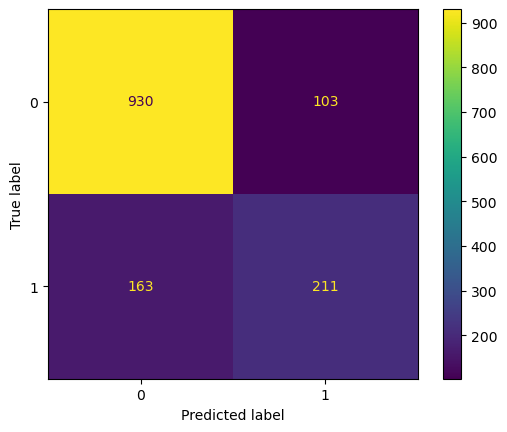

In [634]:
test_pred_y_sgd = grid_sgd.predict(test_x)
ConfusionMatrixDisplay.from_predictions(test_y, test_pred_y_sgd)
plt.show()

In [637]:
print('Accuracy score = ',accuracy_score(test_y,test_pred_y_sgd))
print("Percision Score = " , precision_score(test_y,test_pred_y_sgd))
print("Recall Score = " , recall_score(test_y,test_pred_y_sgd))

Accuracy score =  0.8109452736318408
Percision Score =  0.6719745222929936
Recall Score =  0.5641711229946524


In [657]:
final_model = grid_sgd.best_estimator_

In [658]:
import joblib
joblib.dump(final_model,'Churn final model.pkl')

['Churn final model.pkl']

In [659]:
joblib.load('Churn final model.pkl')

SGDClassifier(early_stopping=True, eta0=0.05, learning_rate='adaptive',
              loss='log_loss')